# Stochastic Simulation

*Winter Semester 2023/24*

09.02.2024

Prof. Sebastian Krumscheid<br>
Asstistant: Stjepan Salatovic

<h3 align="center">
Exercise sheet 11
</h3>

---

<h1 align="center">
Markov Chains Monte Carlo
</h1>

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from scipy.stats import norm
from tqdm.notebook import tqdm
from typing import List, Tuple

In [2]:
plt.rc('axes', labelsize=14)     # fontsize of the x and y labels
plt.rc('xtick', labelsize=12)    # fontsize of the tick labels
plt.rc('ytick', labelsize=12)    # fontsize of the tick labels
plt.rc('legend', fontsize=14)    # legend fontsize

## Exercise 1

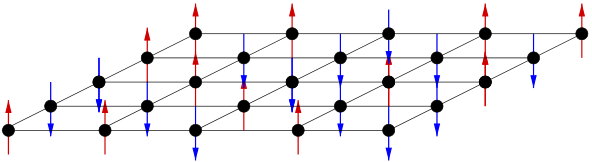

Let us consider a 2D uniform square-lattice with atoms placed at each
vertex, as is sketched in the Figure above.
The atoms can have an upward (red arrow) or a downward (blue
arrow) pointing magnetic moment (so-called _spin_). Specifically,
let the lattice be made out of $m \times m$ atoms. Therefore the
system's possible states are the $2^{m^2}$ possible spin choices for
the $m^2$ atoms.  That is, the spin of the atom at position
$(i,j)$ in the lattice is denoted with $s_{ij}$, $1\le i,j\le m$, and
can take a value in $\{-1,+1\}$. A specific system configuration is
described by the matrix
$\boldsymbol{S}=\left( s_{ij} \right)\in \{-1,+1\}^{m\times m}$,
containing the spin of each of the $m^2$ atoms.

The energy of a given system state of this Ising model is given by $$\tag{1} H(\boldsymbol{S}) = - \sum_{i,j=1}^{m} \left( \frac{1}{2} J s_{ij} (s_{i-1,j} + s_{i+1,j} + s_{i,j-1} + s_{i,j+1}) + Bs_{ij}\right)\;,$$
where $J$ is a magnetic coupling constant and $B$ is a constant
describing the external magnetic field. To account for boundary
effects, we set $s_{0,j}= s_{j,0} = s_{m+1,j} = s_{j,m+1} = 0$ for all $j \in \{1, \ldots, m\}$ in (1).
The probability of obtaining a specific system state is then given by the
_Boltzmann_ distribution with Probability Mass Function (PMF) $$\tag{2} f(\boldsymbol{S})\equiv f_\beta(\boldsymbol{S}) = \frac{1}{Z_\beta} e^{-H(\boldsymbol{S})\beta}\;,$$
where $\beta = 1/(k_B T)$ denotes the so-called inverse-temperature
(or thermodynamic beta) with $k_B$ being the Boltzmann constant and
$T$ the absolute temperature. Here, $Z_\beta$ denotes the
normalization constant that makes the target distribution
$f_\beta\colon \{-1,+1\}^{m\times m}\to \mathbb{R}_+$ a proper PMF.

Let's denote by $M(\boldsymbol{S}) =  \sum_{i,j=1}^{m} s_{ij}/m^2$
the system's average magnetic moment corresponding to the configuration
$\boldsymbol{S}$.
Notice that the random realizations of the
configuration matrix $\boldsymbol{S}$ depend on the inverse
temperature $\beta$. 
The expected value of the average magnetic moment $\overline{M}(\beta)$
as a function of the inverse temperature $\beta$ thus reads $$\tag{3}\overline{M}(\beta) %= \mathbb{E }\left[M(\boldsymbol{S}) \right]
= \sum_{\boldsymbol{S}\in \mathcal{K}} M(\boldsymbol{S}) f_\beta(\boldsymbol{S}) =  \frac{1}{Z_\beta} \sum_{\boldsymbol{S}\in \mathcal{K}} M(\boldsymbol{S}) e^{-H(\boldsymbol{S})\beta} \;,$$
where $\mathcal{K}=\{-1,1  \}^{m\times m}$ is the set of all possible system
configurations. Since the explicit computation of the normalization
constant $Z_\beta$ is computationally expensive (Explain why!), we
rely on the Metropolis–Hastings algorithm here. That is, at each step
a candidate configuration is proposed by randomly choosing an atom, with uniform
probability,  and  "flipping" its
spin.

1. Write a function that implements the Metropolis–Hastings
	algorithm for the Ising model. The input parameters for your
	function are: the number of steps $n$ of the chain that should be
	simulated, the number of atoms $m^2$, the inverse temperature
	$\beta$, the constants $J$ and $B$, and the initial state of the
	system. The function should return a list of energies and mean magnetic
	moments computed for each step of the chain, as well as the final
	configuration of the system.

In [3]:
def H(S: np.array, J: float, B: float) -> float:
    """
    Computes the energy of a given system state `S` in the context of the Ising model.

    Args:
        S (np.array): The state of the system, represented as a 2D numpy array of spins, where each spin can be +1 or -1.
        J (float): The magnetic coupling constant between neighboring spins.
        B (float): The external magnetic field constant interacting with the spins.

    Returns:
        float: The total energy of the system state `S`.
    """
    # TODO
    return

The following cell verifies the correct implementation of your `H` function. If the `assert` statement passes without raising an error, it indicates that your function behaves as expected.

In [ ]:
# CHECKPOINT
np.random.seed(999)
m = 50
random_state = np.random.choice([-1, 1], size=(m, m))

assert H(random_state, J=1, B=0.25) == 52

In [5]:
def ising(n: int, m: int, beta: float, J: float, B: float, S0: np.array) -> Tuple[np.array, np.array, np.array]:
    """
    Simulates the Ising model using the Metropolis algorithm over a square lattice.

    Args:
        n (int): The number of steps to perform.
        m (int): The size of the lattice (m x m).
        beta (float): The inverse temperature of the system (1/kT).
        J (float): The magnetic coupling constant between neighboring spins.
        B (float): The external magnetic field constant interacting with the spins.
        S0 (np.array): The initial state of the system, a 2D numpy array of spins (m x m).

    Returns:
        - E (np.array): The energy of the system at each step.
        - M (np.array): The magnetic moment of the system at each step.
        - S (np.array): The final state of the system.
    """
    # TODO
    return

2. Use your function with $\beta=1/3$ and for $n$, such that both the energy and the average magnetic moment appear to have reached stationarity. 
	Plot also the final system configuration.
	Furthermore, compute the mean magnetic moment $\overline{M}(\beta)$
	for different values of $\beta\in [\frac{1}{3},1]$ and
	$n=5\cdot 10^6$.  Choose a lattice of $50 \times 50$ atoms, $J=1$,
	and $B>0$, say $B = 10^{-1}$, for all simulations.

    **Hint:** For plotting a system state, have a look at the [`plt.spy()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.spy.html) function.

## Exercise 2

Recall that the standard Metropolis–Hastings algorithm accepts a new candidate state $j$ drawn from the transition matrix $Q$, given the current state $i$, with probability $\alpha(i,j)=\min \left(\frac{\pi_j Q_{ji}}{\pi_i Q_{ij}},1\right)$, where $\pi$ is the target probability measure.
Consider now a Metropolis-Hastings algorithm that uses the follwing alternative acceptance probabilities $$\alpha_1(i,j)=\frac{\pi_j Q_{ji}}{\pi_jQ_{ji}+\pi_iQ_{ij}},$$ and $$\alpha_2(i,j)=\frac{\delta_{ij}}{\pi_i Q_{ij}},$$ with $\delta$ such that $\delta_{ij} \leq \pi_i Q_{ij} \forall i,j$. 
Show that, in both cases, the produced Markov chain satisfies the detailed balance condition.

## Exercise 3 (Optional)
Consider the following AR(k) model defined by $$\mathbf{y}_n = A \mathbf{ y}_{n-1} +\mathbf{ \xi}_n, \quad \mathbf{ \xi}_n\overset{\text{iid}}{\sim} \mathcal{N}(0,\Gamma), \ \ \mathbf{ \xi}_n\in\mathbb{R}^k,$$ with $ A\in \mathbb{R}^{k\times k}$, invertible and $\Gamma\in \mathbb{R}^{k\times k} $ full rank.

1. Show that the previous process is a Markov chain.

2. Show that if $\mathbf{ y}_0 \sim \mathcal{N}(0,\Gamma_0)$, then $\mathbf{y}_n$ follows  a multivariate Gaussian distribution for all $n$. 

3. Find the invariant distribution of an AR(1) process (i.e., a special case of the previous model). 

4. Simulate the AR(1) process with $a = 0.8, \gamma = 0.2, \gamma_0 = 2$ and assess its convergence to the invariant distribution. In addition, verify the ergodic theorem on the quantity  $$\hat \mu^N=\frac{1}{N}\sum_{n=1}^{N}y_n.$$ 

In [6]:
def AR_1(a: float, gamma: float, gamma0: float, n: int, n_samples: int) -> np.array:
    """
    Generates samples from an autoregressive process of order 1 (AR(1)).

    Args:
        a (float): The autoregressive coefficient.
        gamma (float): The variance of the innovation process.
        gamma0 (float): The variance of the initial observation.
        n (int): The number of time steps in the AR(1) process.
        n_samples (int): The number of independent AR(1) processes to simulate.

    Returns:
        np.array: A two-dimensional numpy array where each row represents one AR(1) process,
                  and each column represents a time step.
    """
    # TODO
    return

5. Establish theoretically the convergence of $\hat \mu ^N$ by using the strong law of large numbers, and a weighted version of the central limit theorem (e.g. Lindeberg-Feller).